# Object Detection OpenCV
- Template Matching: Looks for a copy of an image within a larger image,
- corner detection, edge detection, grid detection.
- contour detection allows us to detect foreground vs background
- Feature matching, detecting matching objects in another image
- Watershed algorithm
- Facial, Eye Detection
- project, blur a license plate.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import torch


## Template Matching
- Scans a larger image for a provided template by sliding template across the larger image.
- Similar to a kernal but instead it is an image


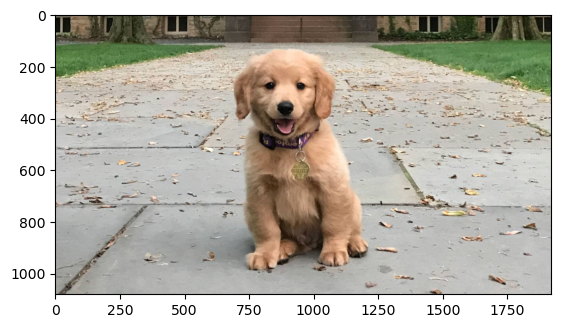

In [ ]:
full = cv.imread("../Notables/Detection/Dog_full.jpg")
full = cv.cvtColor(full, cv.COLOR_BGR2RGB)
plt.imshow(full)

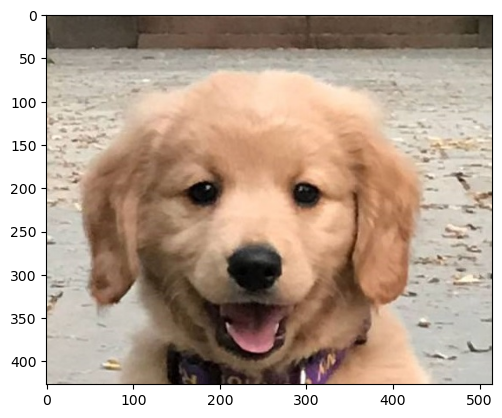

In [ ]:

#note this is a cropped out portion of the above image, meaning it is the exact size of the face above
target = cv.imread("../Notables/Detection/Dog.jpg")
target = cv.cvtColor(target, cv.COLOR_BGR2RGB)
plt.imshow(target)

In [ ]:
full.shape, target.shape

((1080, 1920, 3), (427, 515, 3))

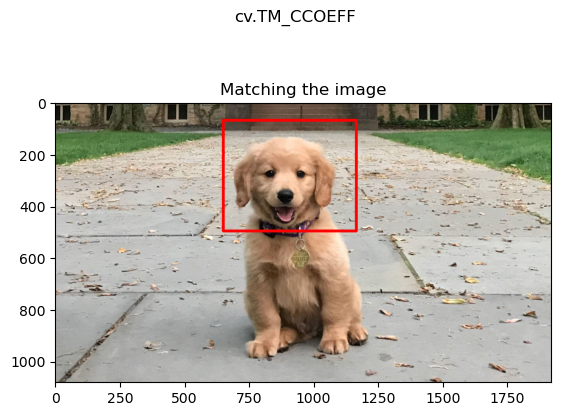

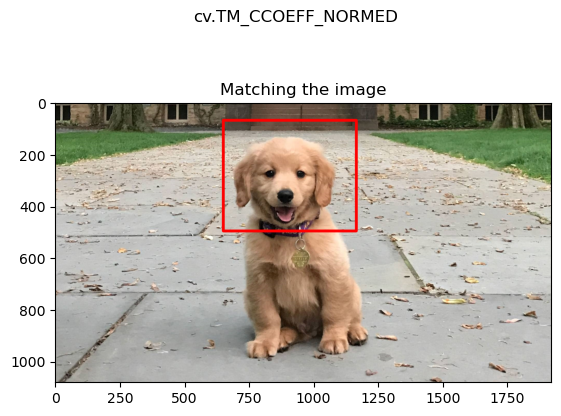

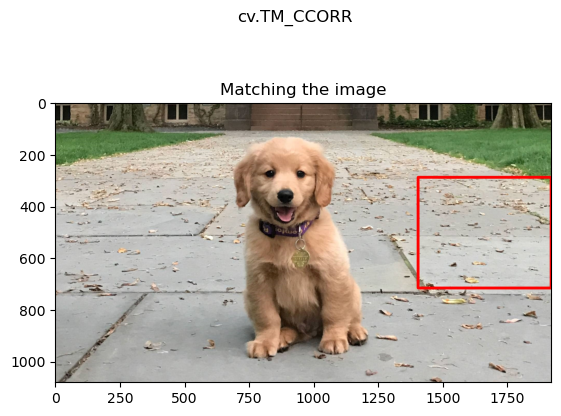

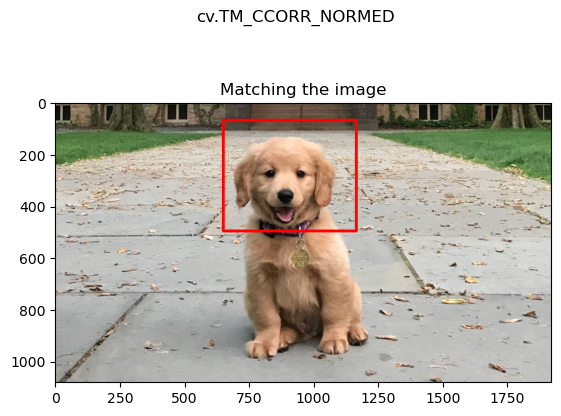

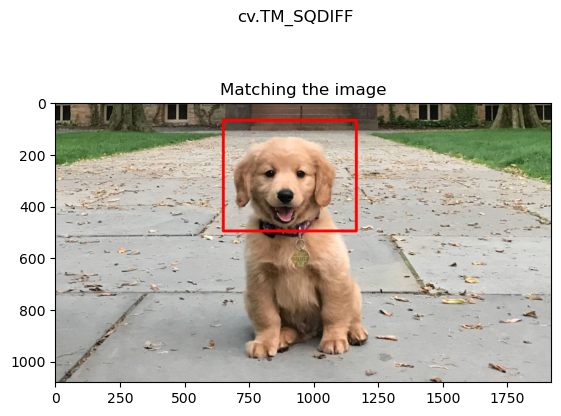

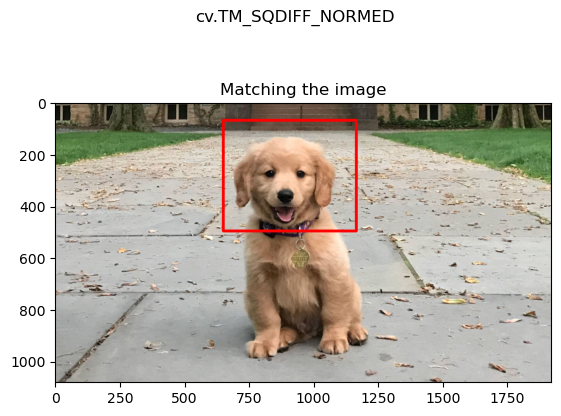

In [ ]:
#eval function, allows us to evaluate a string as a function
#example
myfunct = eval('sum') #converts this string into the built in function sum

#now we can create a list of methods to test the image template matching on.
methods = [ 'cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for m in methods:
    full_copy = full.copy()
    method = eval(m)
    #Template matching, image, target, method
    res = cv.matchTemplate(full_copy, target, method)
    #the result is a heat map that highlights where the image match starts
    #we will grab the min and max from the heat map to draw a rectangle around the location
    min, max, min_loc, max_loc = cv.minMaxLoc(res) #returns large tuple of the min/max and their locations
    #since square differnce highlights the lowest values instead of the highest we have to accomadate
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y) position
    else:
        top_left = max_loc
    height, width, channels = target.shape
    bottom_r = (top_left[0]+width, top_left[1]+height)
    #now we have the bottom right and top left of our image
    cv.rectangle(full_copy, top_left, bottom_r, (255,0,0), 10)

    #display the image\
    plt.imshow(full_copy)

    plt.title("Matching the image")
    plt.suptitle(m)
    plt.show()


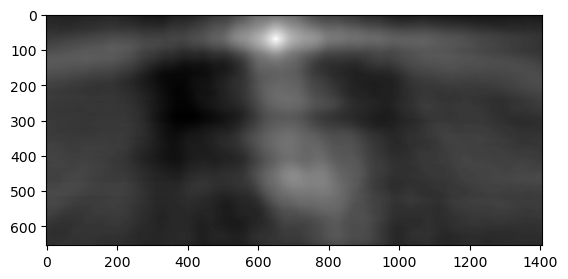

In [ ]:
#example of the heat map
heat_map = cv.matchTemplate(full, target, eval(methods[0]))
plt.imshow(heat_map, 'gray')


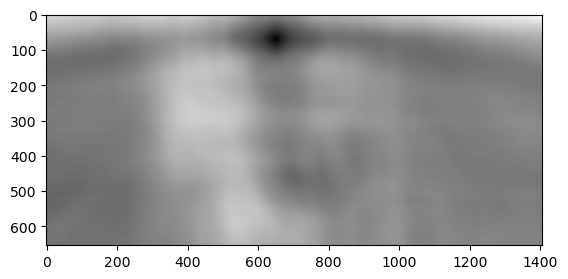

In [ ]:
heat_map = cv.matchTemplate(full, target, eval(methods[5]))
plt.imshow(heat_map, 'gray')

## Corner Detection
- A corner is a point where the local neighborhood is a sudden change in edge brighness
- Junction of two edges

### Harris Corner Detection
- on a simple corner we look for a large change when moving a region across an image
- flat images have no change when moved around, taking a corner and moving it will have a major change.

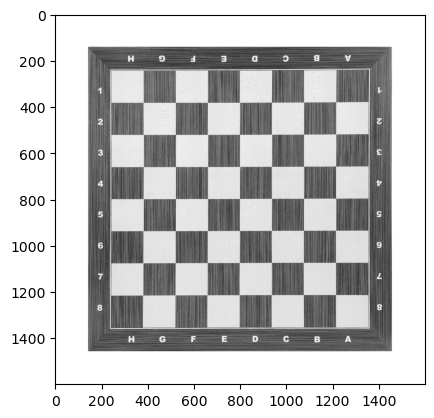

In [ ]:
flat_chess = cv.imread("../Notables/Detection/chess.jpg")
flat_chess = cv.cvtColor(flat_chess, cv.COLOR_BGR2RGB)
plt.imshow(flat_chess)

#chess board has clear corners and edges
#load in grayscale
gray_chess = cv.cvtColor(flat_chess, cv.COLOR_RGB2GRAY)
plt.imshow(gray_chess, 'gray')

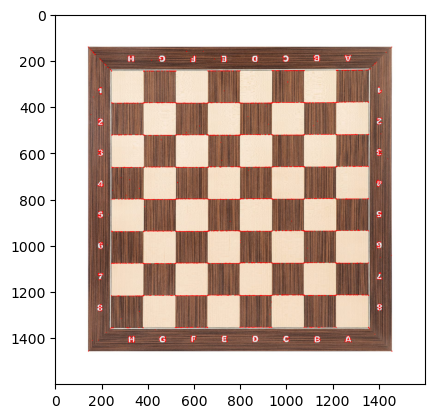

In [ ]:
#we need to convert the gray image to floating point values for the harris detection algorithm
gray = np.float32(gray_chess)
#apply the corner harris detection, block size (neighborhood size), ksize(sobel operator apature peramter), k is the harris detector free parameter
dst = cv.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)
#the result is dialated for marking the corners
dst = cv.dilate(dst, None)
#this checks wherever the dst result is greater than 1% of the max value, set to red
flat_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(flat_chess)